# Lecture 6

### Main Sequence of Star Forming galaxies

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy
from astropy.table import Table
!pip install pandas
import pandas

Read the fits file and extract the stellar mass and the SFR

In [2]:
data=Table.read('./out/results.fits', format = 'fits')
data=data.to_pandas()
mass=np.array(data.loc[:,"best.stellar.m_star"])
sfr=np.array(data.loc[:,"bayes.sfh.sfr10Myrs"])
sfr_err=np.array(data.loc[:,"bayes.sfh.sfr10Myrs_err"])

Visualize the data

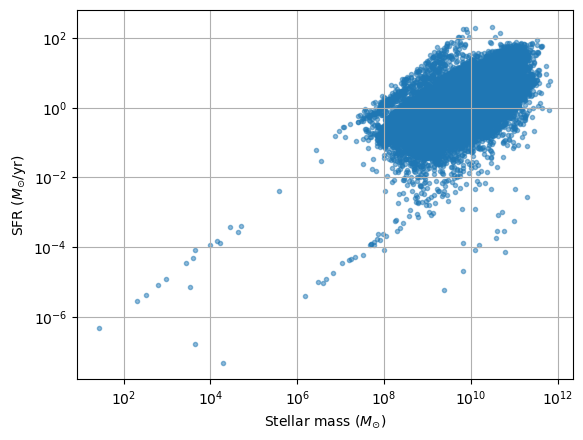

In [3]:
plt.scatter(mass, sfr, marker='.', alpha=0.5)
plt.loglog()

plt.xlabel('Stellar mass ($M_{\odot}$)')
plt.ylabel('SFR ($M_{\odot}$/yr)')

plt.grid()
plt.show()

Compute the log of the data

In [4]:
MASS = np.log10(mass)
SFR = np.log10(sfr)

Try and fit the log of the data with a straight line

In [5]:
par = np.polyfit(MASS, SFR, 1)
print("Parameters: " + str(par))

Parameters: [ 0.55226138 -5.04930311]


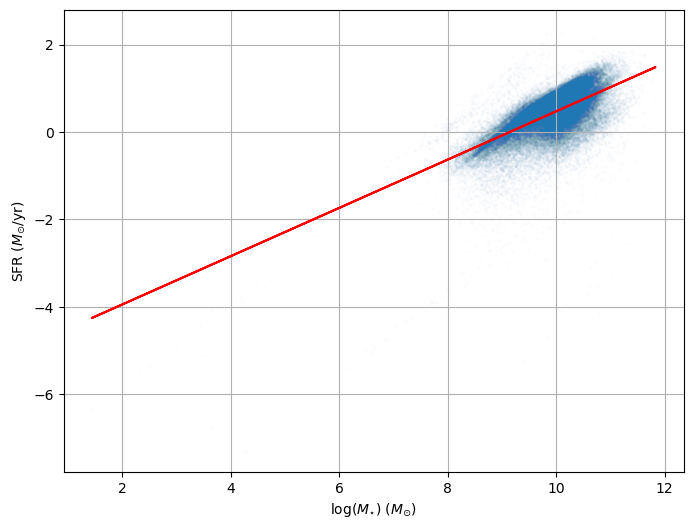

In [6]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(MASS, SFR, marker='.', s=7, alpha=0.01)
plt.plot(MASS, np.polyval(par, MASS), color='red')

plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('SFR ($M_{\odot}$/yr)')

plt.grid()
plt.show()

We see that the fit is not good to describe the main sequence of star forming galaxies. We need to cut the quiescent (passive) galaxies. To do so, we make the slope horizontal by computing the specific sfr, so divide the sfr by the mass (subtruct if we work with the log). Then we cut the points under a certain threshold (chosen by us, trying to keep most of the main sequence galaxies).

<span style="color:red">! check the units of sSFR !</span> 

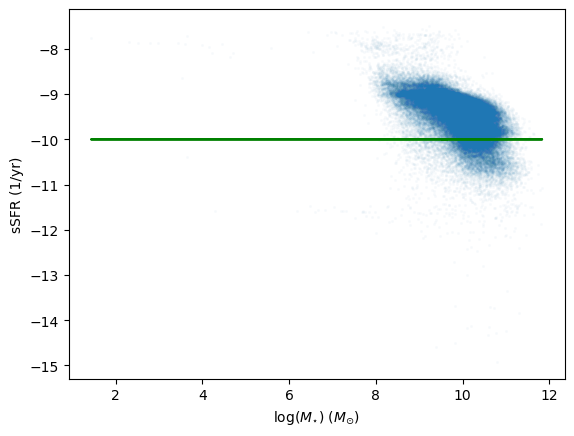

In [7]:
sSFR = SFR - MASS

def const(x, a):
    return 0*x+a


#Visualize the data

plt.scatter(MASS, sSFR, marker='.', s=7, alpha = 0.02)
plt.plot(MASS, const(MASS, -10), color = 'green')

plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

#plt.grid()
plt.show()

In [8]:
# Cut the data
mask = sSFR > -10
MASS_filtered = MASS[mask]
sSFR_filtered = sSFR[mask]

print("Vettore x filtrato:", MASS_filtered)
print("Vettore y filtrato:", sSFR_filtered)

Vettore x filtrato: [ 9.22804333 10.08430451 10.30829268 ... 10.61229764  9.81505479
  9.52425228]
Vettore y filtrato: [-8.9669154  -9.81040119 -9.24124058 ... -9.67530596 -9.44138603
 -9.02098635]


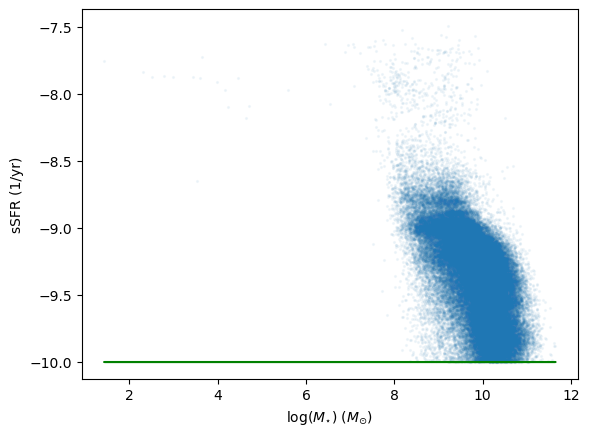

In [9]:
plt.scatter(MASS_filtered, sSFR_filtered, marker='.', s=7, alpha=0.05)
plt.plot(MASS_filtered, const(MASS_filtered, -10), color = 'green')

plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

#plt.grid()
plt.show()

Now we go back to SFR and redo the fit with the filtered data

In [10]:
SFR_filtered = sSFR_filtered + MASS_filtered

In [11]:
par_new = np.polyfit(MASS_filtered, SFR_filtered, 1)
print("Parameters: " + str(par_new))

Parameters: [ 0.64895132 -5.90313231]


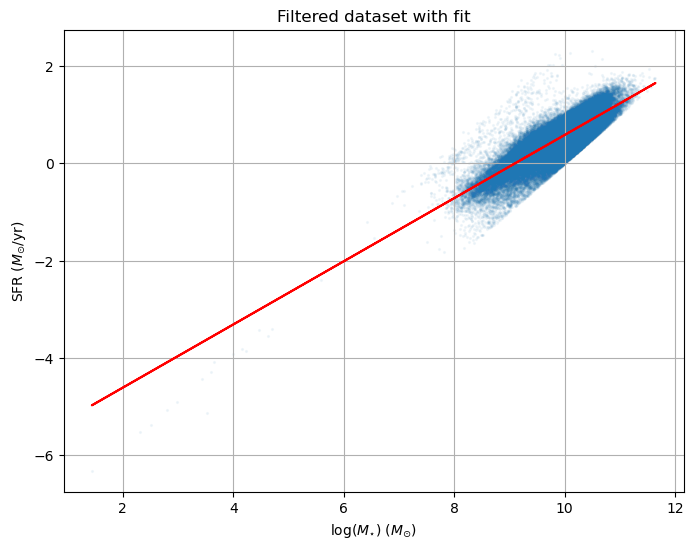

In [12]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(MASS_filtered, SFR_filtered, marker='.', s=7, alpha = 0.05)
plt.plot(MASS_filtered, np.polyval(par_new, MASS_filtered), color='red')

plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('SFR ($M_{\odot}$/yr)')
plt.title('Filtered dataset with fit')

plt.grid()
plt.show()

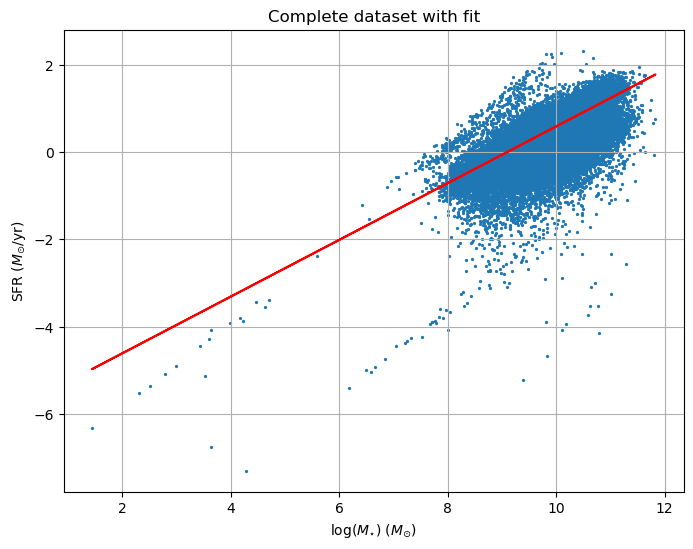

In [13]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(MASS, SFR, marker='.', s=7, alpha=1)
plt.plot(MASS, np.polyval(par_new, MASS), color='red')

plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('SFR ($M_{\odot}$/yr)')
plt.title('Complete dataset with fit')

plt.grid()
plt.show()